In [3]:
#loading the packages
import pandas as pd
import json
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import spacy
from collections import Counter
#import en_core_web_sm\
import re
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import time

In [2]:
#loading german test dataset
test_de = pd.read_json("dataset_de_test.json", lines=True)
test_de.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,de_0784695,product_de_0572654,reviewer_de_0645436,1,"Leider, leider nach einmal waschen ausgebliche...",Leider nicht zu empfehlen,de,home
1,de_0759207,product_de_0567331,reviewer_de_0183703,1,zunächst macht der Anker Halter einen soliden ...,Gummierung nach 6 Monaten kaputt,de,wireless
2,de_0711785,product_de_0482105,reviewer_de_0182152,1,Siegel sowie Verpackung war beschädigt und war...,Flohmarkt ware,de,industrial_supplies
3,de_0964430,product_de_0616480,reviewer_de_0991563,1,Habe dieses Produkt NIE erhalten und das Geld ...,Katastrophe,de,industrial_supplies
4,de_0474538,product_de_0228702,reviewer_de_0316188,1,Die Träger sind schnell abgerissen,Reißverschluss klemmt,de,luggage


In [3]:
#checking the shape
test_de.shape

(5000, 8)

In [4]:
#loading English test data set
test_en = pd.read_json("dataset_en_test.json", lines=True)
test_en.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,en_0199937,product_en_0902516,reviewer_en_0097389,1,"These are AWFUL. They are see through, the fab...",Don’t waste your time!,en,apparel
1,en_0863335,product_en_0348072,reviewer_en_0601537,1,I bought 4 and NONE of them worked. Yes I used...,One Star,en,other
2,en_0565010,product_en_0356154,reviewer_en_0970351,1,On first use it didn't heat up and now it does...,Totally useless,en,other
3,en_0963290,product_en_0583322,reviewer_en_0216125,1,You want an HONEST answer? I just returned fro...,Gold filled earrings,en,jewelry
4,en_0238156,product_en_0487636,reviewer_en_0514203,1,The glue works fine but the container is impos...,Poor container,en,industrial_supplies


In [5]:
#checking the shape
test_en.shape

(5000, 8)

In [6]:
#loading Spanish test data
test_es = pd.read_json("dataset_es_test.json", lines=True)
test_es.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home
2,es_0411746,product_es_0138642,reviewer_es_0508607,1,Estoy muy decepcionado con el vendedor ya que ...,ESTAFA EN EL ENVÍO,es,toy
3,es_0786686,product_es_0170887,reviewer_es_0491157,1,Mi valoración no es sobre el producto sino sob...,Estafa de Amazon,es,home
4,es_0429700,product_es_0710642,reviewer_es_0008745,1,Pues tenía interés en este libro y probé la ve...,No conseguí pasar de la portada en Kindle,es,digital_ebook_purchase


In [7]:
#checking the shape
test_es.shape

(5000, 8)

In [8]:
#loading French test data
test_fr = pd.read_json("dataset_fr_test.json", lines=True)
test_fr.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,fr_0797681,product_fr_0072745,reviewer_fr_0724113,1,Ca c'est du vol... Vous ne recevrez q'une lame...,ARNAQUE,fr,home_improvement
1,fr_0329266,product_fr_0182588,reviewer_fr_0116929,1,"Presque 1 mois après la commande, le produit n...",NON REÇU!!!!,fr,baby_product
2,fr_0745602,product_fr_0542787,reviewer_fr_0704676,1,"Amazon n’a pu me livrer ce produit, je suis dé...",État d’âme,fr,home_improvement
3,fr_0186758,product_fr_0724656,reviewer_fr_0005830,1,"Pas adapté au boîtier, il flotte dedans.",Trop grand !,fr,wireless
4,fr_0099947,product_fr_0453835,reviewer_fr_0403195,1,"Heureusement qu'Amazon a le sens des affaires,...",Fuyez !!!,fr,wireless


In [9]:
#checking the shape
test_fr.shape

(5000, 8)

In [3]:
#loading English train data 
train_en = pd.read_json("dataset_en_train.json", lines=True)
train_en.head()


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,en_0964290,product_en_0740675,reviewer_en_0342986,1,Arrived broken. Manufacturer defect. Two of th...,I'll spend twice the amount of time boxing up ...,en,furniture
1,en_0690095,product_en_0440378,reviewer_en_0133349,1,the cabinet dot were all detached from backing...,Not use able,en,home_improvement
2,en_0311558,product_en_0399702,reviewer_en_0152034,1,I received my first order of this product and ...,The product is junk.,en,home
3,en_0044972,product_en_0444063,reviewer_en_0656967,1,This product is a piece of shit. Do not buy. D...,Fucking waste of money,en,wireless
4,en_0784379,product_en_0139353,reviewer_en_0757638,1,went through 3 in one day doesn't fit correct ...,bubble,en,pc


In [4]:
#checking the shape
train_en.shape

(200000, 8)

In [10]:
#extracting a sample of 20 observations to create a separate sample to test on the short data
train_short=train_en[train_en.index.isin([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])]
train_short.shape

(20, 8)

In [11]:
list_dme=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]


In [13]:
indexes_to_keep = set(range(train_en.shape[0])) - set(list_dme)
df_train_en = train_en.take(list(indexes_to_keep))
df_train_en.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
20,en_0402396,product_en_0144253,reviewer_en_0403760,1,"I had problem with the 2 screen protectors, an...","I had problem with the 2 screen protectors, an...",en,wireless
21,en_0779464,product_en_0925368,reviewer_en_0232341,1,The product was faulty and seller offered refu...,Not worth $40,en,beauty
22,en_0210731,product_en_0460656,reviewer_en_0830635,1,Do not bother buying these toys. Didn’t even l...,Cheap,en,pet_products
23,en_0305338,product_en_0202360,reviewer_en_0435908,1,I never got my item even though it said delive...,Never revived item,en,beauty
24,en_0203840,product_en_0666988,reviewer_en_0390375,1,I used to have a much used & well loved OXO co...,No Longer a Quality Product,en,kitchen


In [14]:
#resetting the index after the data extraction
df_train_en.reset_index(drop=True, inplace=True)

In [4]:
#loading German train data
train_de = pd.read_json("dataset_de_train.json", lines=True)
train_de.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,de_0203609,product_de_0865382,reviewer_de_0267719,1,Armband ist leider nach 1 Jahr kaputt gegangen,Leider nach 1 Jahr kaputt,de,sports
1,de_0559494,product_de_0678997,reviewer_de_0783625,1,In der Lieferung war nur Ein Akku!,EINS statt ZWEI Akkus!!!,de,home_improvement
2,de_0238777,product_de_0372235,reviewer_de_0911426,1,"Ein Stern, weil gar keine geht nicht. Es hande...",Achtung Abzocke,de,drugstore
3,de_0477884,product_de_0719501,reviewer_de_0836478,1,"Dachte, das wären einfach etwas festere Binden...",Zu viel des Guten,de,drugstore
4,de_0270868,product_de_0022613,reviewer_de_0736276,1,Meine Kinder haben kaum damit gespielt und nac...,Qualität sehr schlecht,de,toy


In [17]:
#extracting a sample of 20 observations to create a separate sample to test on the short data
train_short_de=train_de[train_de.index.isin([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])]
train_short_de.shape

(20, 8)

In [18]:
indexes_to_keep_de = set(range(train_de.shape[0])) - set(list_dme)
df_train_de = train_de.take(list(indexes_to_keep_de))
df_train_de.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
20,de_0922014,product_de_0381382,reviewer_de_0983887,1,Hahn funktioniert nicht. Lässt sich nicht schl...,Hahn lässt sich nicht schließen!,de,home_improvement
21,de_0892147,product_de_0453891,reviewer_de_0254185,1,DHL EXPRESS??? Welcher Mensch schickt bitte an...,Versand unzumutbar,de,electronics
22,de_0372568,product_de_0214043,reviewer_de_0233022,1,Kann ich nichts zu sagen da sie nie angekommen...,Sind NIE angekommen,de,shoes
23,de_0025479,product_de_0034240,reviewer_de_0860469,1,"Nicht mal ein Jahr gehalten. Schade, kann ich ...",Hält nicht lange,de,wireless
24,de_0163656,product_de_0281122,reviewer_de_0833333,1,"Ich würde sie ja gerne bewerten, wenn ich sie ...",Nicht geliefert,de,automotive


In [21]:
#loading Spanish train data
train_es = pd.read_json("dataset_es_train.json", lines=True)
train_es.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


In [22]:
train_es.shape

(200000, 8)

In [23]:
#extracting a sample of 20 observations to create a separate sample to test on the short data
train_short_es=train_es[train_es.index.isin([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])]
train_short_es.shape

(20, 8)

In [24]:
indexes_to_keep_es = set(range(train_es.shape[0])) - set(list_dme)
df_train_es = train_es.take(list(indexes_to_keep_es))
df_train_es.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
20,es_0234773,product_es_0873332,reviewer_es_0138576,1,"Despues de 2 meses escasos de uso, acabo de da...",Despues de 2 meses con apenas uso se esta hund...,es,furniture
21,es_0379538,product_es_0807931,reviewer_es_0458908,1,Las roscas si mueves un poco el tubo se salen ...,Material malo,es,pet_products
22,es_0787870,product_es_0604258,reviewer_es_0077883,1,Nunca llego el pedido y el vendedor pasa de to...,No llego nunca,es,sports
23,es_0533891,product_es_0201015,reviewer_es_0187049,1,"Desastroso, no tiene ni un año y ha dejado de ...",HA DEJADO DE FUNCIONAR,es,electronics
24,es_0874140,product_es_0643211,reviewer_es_0753747,1,No vale para nada la linterna dinero tirado a ...,Muy descontento,es,home_improvement


In [25]:
#loading French train data
train_fr = pd.read_json("dataset_fr_train.json", lines=True)
train_fr.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,fr_0424335,product_fr_0297678,reviewer_fr_0961886,1,A déconseiller - Article n'a fonctionné qu'une...,Brumisateur à pompe,fr,beauty
1,fr_0452615,product_fr_0613288,reviewer_fr_0857499,1,Si vous voulez être déçu achetez le produit ! ...,Insatisfaisant,fr,baby_product
2,fr_0407673,product_fr_0571250,reviewer_fr_0383240,1,"Écran de mauvaise qualité, car il s'use en peu...",Ne recommande pas,fr,pc
3,fr_0579191,product_fr_0030168,reviewer_fr_0729693,1,Cet engin ne sert à rien les sons sont pourris...,A éviter!,fr,musical_instruments
4,fr_0931533,product_fr_0468261,reviewer_fr_0734066,1,Très beau produit mais la grue n'a pas fonctio...,Déçue,fr,toy


In [17]:
#checking the shape
train_fr.shape

(200000, 8)

In [26]:
#extracting a sample of 20 observations to create a separate sample to test on the short data
train_short_fr=train_fr[train_fr.index.isin([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])]
train_short_fr.shape

(20, 8)

In [27]:
indexes_to_keep_fr = set(range(train_fr.shape[0])) - set(list_dme)
df_train_fr = train_fr.take(list(indexes_to_keep_fr))
df_train_fr.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
20,fr_0497116,product_fr_0739436,reviewer_fr_0079605,1,Le produit est noté comme livré depuis le 31 j...,Article non reçu !,fr,home
21,fr_0014704,product_fr_0898711,reviewer_fr_0614903,1,Pas terrible ce n’ai pas comme des faux cils n...,Rien ne vaut les vrais faux cils,fr,beauty
22,fr_0851295,product_fr_0101306,reviewer_fr_0851899,1,Je n’ai jamais reçu le produit,Jamais reçu,fr,home
23,fr_0148716,product_fr_0735028,reviewer_fr_0121344,1,"Appareil complètement inutile, il peigne mais ...",Il ne coupe rien,fr,sports
24,fr_0689615,product_fr_0645938,reviewer_fr_0049041,1,"Au bout de 5 utilisations SEULEMENT , la clé U...",Clé USB inutilisable,fr,pc


In [29]:
#concatenating train data for 4 laguages
train= pd.concat([df_train_fr, df_train_es, df_train_de, df_train_en], axis=0)
train.shape

(799920, 8)

In [31]:
#resetting the index
train.reset_index(drop=True, inplace=True)

In [32]:
#saving as an xlsx file
train.to_excel('train.xlsx')

In [33]:
#concatenating a short sample data
short = pd.concat([train_short_fr, train_short_es,train_short_de, train_short], axis=0)
short.reset_index(drop=True, inplace=True)
short.to_excel('short.xlsx')
short.shape

(80, 8)

In [19]:
#concatenating test data
test = pd.concat([test_fr, test_es,test_en, test_de], axis=0)
test.shape

(20000, 8)

In [22]:
#saving the test set
test.to_excel('test.xlsx')

In [27]:
#checking data types for the training data
train_df.dtypes

Unnamed: 0           int64
review_id           object
product_id          object
reviewer_id         object
stars                int64
review_body         object
review_title        object
language            object
product_category    object
dtype: object

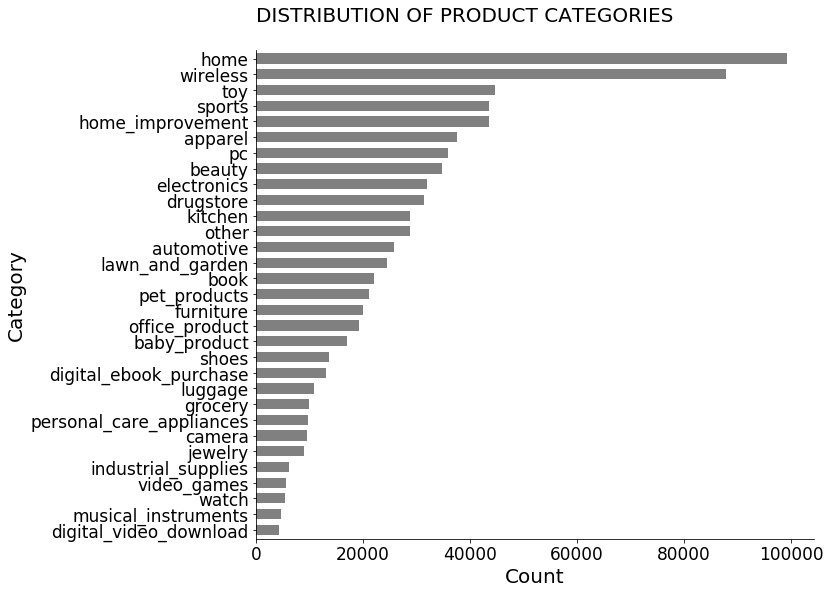

In [27]:
#plotting product categories
fig = plt.figure(figsize = (10,9))
ax = train_df['product_category'].value_counts().sort_values(ascending=True).plot(kind='barh',color = 'gray',fontsize=17, width = 0.65)
ax.set_title('DISTRIBUTION OF PRODUCT CATEGORIES\n', fontsize=20,  loc='left')
ax.set_xlabel('Count', fontsize=20)
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)
ax.set_ylabel('Category', fontsize=20);
plt.show()

In [6]:
#dropping unnamed column
train_df = train_df.drop(columns=['Unnamed: 0'])

In [25]:
#summary information for the numeric variables
train_df.describe()

,stars
count,800000.000000
mean,3.000000
std,1.414214
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [26]:
#summary information of the rest of the data frame
df_cat=train_df.drop(columns=['stars'])
df_cat.describe()

,review_id,product_id,reviewer_id,review_body,review_title,language,product_category
count,800000,800000,800000,800000,799973,800000,800000
unique,800000,666021,748314,795103,492037,4,31
top,fr_0677741,product_es_0261843,reviewer_es_0437514,Conforme à la description,Three Stars,es,home
freq,1,8,7,137,4169,200000,99293


In [27]:
#checking missing values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   review_id         800000 non-null  object
 1   product_id        800000 non-null  object
 2   reviewer_id       800000 non-null  object
 3   stars             800000 non-null  int64 
 4   review_body       800000 non-null  object
 5   review_title      799973 non-null  object
 6   language          800000 non-null  object
 7   product_category  800000 non-null  object
dtypes: int64(1), object(7)
memory usage: 48.8+ MB


In [7]:
#removing observations that have 0 in the reviews instead of text
train_df=train_df[train_df['review_body']!=0]

In [8]:
#checking shape again
train_df.shape

(799918, 8)

In [9]:
#converting to lowercase
train_df['review_body']=train_df['review_body'].str.lower()

In [10]:
#checking the result
train_df

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,fr_0497116,product_fr_0739436,reviewer_fr_0079605,1,le produit est noté comme livré depuis le 31 j...,Article non reçu !,fr,home
1,fr_0014704,product_fr_0898711,reviewer_fr_0614903,1,pas terrible ce n’ai pas comme des faux cils n...,Rien ne vaut les vrais faux cils,fr,beauty
2,fr_0851295,product_fr_0101306,reviewer_fr_0851899,1,je n’ai jamais reçu le produit,Jamais reçu,fr,home
3,fr_0148716,product_fr_0735028,reviewer_fr_0121344,1,"appareil complètement inutile, il peigne mais ...",Il ne coupe rien,fr,sports
4,fr_0689615,product_fr_0645938,reviewer_fr_0049041,1,"au bout de 5 utilisations seulement , la clé u...",Clé USB inutilisable,fr,pc
...,...,...,...,...,...,...,...,...
799915,en_0046316,product_en_0980158,reviewer_en_0629807,5,"cute slippers, my mil loved them.",Nice and fit as advertised,en,shoes
799916,en_0956024,product_en_0954574,reviewer_en_0459072,5,my 6 year old likes this and keeps him engaged...,good to keep the kids engaged,en,toy
799917,en_0589358,product_en_0402982,reviewer_en_0199163,5,replaced my battery with it. works like new.,This works,en,wireless
799918,en_0970602,product_en_0873374,reviewer_en_0590563,5,"i like them, holding up well.",Well made.,en,industrial_supplies


In [11]:
#removing numbers
train_df['review_body']=train_df['review_body'].str.replace('\d+', '')

In [12]:
#removing URLS
train_df['review_body']=train_df['review_body'].replace(to_replace=r'https?:\/\/.*[\r\n]*',value='',regex=True)

In [13]:
#a list of contractions and the full form
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
                   "can't've": "cannot have", "'cause": "because", "could've": "could have", 
                   "couldn't": "could not", "couldn't've": "could not have","didn't": "did not","Doesn't":"Does not",
                   "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                   "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
                   "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
                   "he'll've": "he will have", "he's": "he is", "how'd": "how did", 
                   "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
                   "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                   "I'll've": "I will have","I'm": "I am", "I've": "I have", 
                   "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                   "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                   "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                   "it'll": "it will", "it'll've": "it will have","it's": "it is", 
                   "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                   "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                   "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                   "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                       "here's": "here is",
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have", "al": "a el",
                    "del": "de el","puisqu’on":"puisque on","puisqu’il":"puisque il","lorsqu’on":"lorsque on",
                    "lorsqu’il":"lorsque il", "jusqu’à": "jusque à", "jusqu’en":"jusque en", "jusqu’alors":"jusque alors",
                    "jusqu’ici":"jusque ici", "au":"à le","aux":"à les", "auquel":"à lequel","auxquels":"à lesquels",
                    "auxquelles":"à lesquelles","am":"an dem","aufs":"auf das","beim":"bei deim","hinterm":"hinter dem",
                    "durchs":"durch das","fürs":"für das","hinterm":"hinter dem","ins":"in das","im":"in dem","übers":"über das","ums":"um das",
                    "unters":"unter das","unterm":"unter dem","vom":"von dem","vors":"vor das","vorm":"vor dem","zum":"zu dem",
                    "zur":"zu der"}
                       

In [14]:
train_df['review_body']=train_df['review_body'].apply(lambda item: ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in item.split(" ")]))


In [15]:
#removing special characters and punctuation except for 3 important ones
train_df['review_body']=train_df['review_body'].apply(lambda item: ''.join(char for char in item if char.isalnum() or char in {'„', '¿','¡', ' '}))
train_df                                                      

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,fr_0497116,product_fr_0739436,reviewer_fr_0079605,1,le produit est noté comme livré depuis le jui...,Article non reçu !,fr,home
1,fr_0014704,product_fr_0898711,reviewer_fr_0614903,1,pas terrible ce nai pas comme des faux cils na...,Rien ne vaut les vrais faux cils,fr,beauty
2,fr_0851295,product_fr_0101306,reviewer_fr_0851899,1,je nai jamais reçu le produit,Jamais reçu,fr,home
3,fr_0148716,product_fr_0735028,reviewer_fr_0121344,1,appareil complètement inutile il peigne mais n...,Il ne coupe rien,fr,sports
4,fr_0689615,product_fr_0645938,reviewer_fr_0049041,1,à le bout de utilisations seulement la clé u...,Clé USB inutilisable,fr,pc
...,...,...,...,...,...,...,...,...
799915,en_0046316,product_en_0980158,reviewer_en_0629807,5,cute slippers my mil loved them,Nice and fit as advertised,en,shoes
799916,en_0956024,product_en_0954574,reviewer_en_0459072,5,my year old likes this and keeps him engaged ...,good to keep the kids engaged,en,toy
799917,en_0589358,product_en_0402982,reviewer_en_0199163,5,replaced my battery with it works like new,This works,en,wireless
799918,en_0970602,product_en_0873374,reviewer_en_0590563,5,i like them holding up well,Well made.,en,industrial_supplies


In [16]:
#reviews in English
train_df_eng=train_df[train_df['language']=='en']
train_df_eng.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
599940,en_0402396,product_en_0144253,reviewer_en_0403760,1,i had problem with the screen protectors any ...,"I had problem with the 2 screen protectors, an...",en,wireless
599941,en_0779464,product_en_0925368,reviewer_en_0232341,1,the product was faulty and seller offered refu...,Not worth $40,en,beauty
599942,en_0210731,product_en_0460656,reviewer_en_0830635,1,do not bother buying these toys didnt even las...,Cheap,en,pet_products
599943,en_0305338,product_en_0202360,reviewer_en_0435908,1,i never got my item even though it said delivered,Never revived item,en,beauty
599944,en_0203840,product_en_0666988,reviewer_en_0390375,1,i used to have a much used well loved oxo coo...,No Longer a Quality Product,en,kitchen


In [17]:
train_df_eng.shape

(199980, 8)

In [18]:
#counting most frequently used words
from collections import Counter
list_words=Counter(" ".join(train_df_eng["review_body"]).split()).most_common(20)

In [58]:
df_list = pd.DataFrame(list_words)
df_list

,0,1
0,the,342191
1,i,233531
2,it,208495
3,and,186001
4,to,175394
5,a,164356
6,is,121081
7,not,114068
8,for,92352
9,this,91412


In [22]:
#creating a function to represent data in the word cloud
def generate_from_frequencies(self, frequencies):

    frequencies = sorted(frequencies, key=item1, reverse=True)
    frequencies = frequencies[:self.max_words]
    max_frequency = float(frequencies[0][1])

    frequencies = [(word, freq / max_frequency) for word, freq in frequencies]

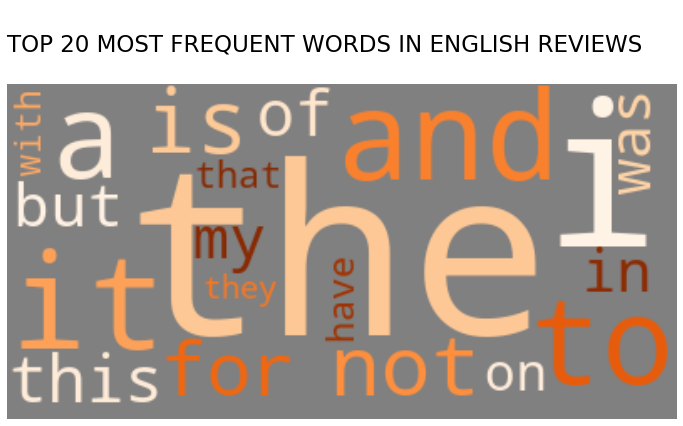

In [60]:
#crating a word cloud for English words
d = {}
for a, x in df_list.values:
    d[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='gray',colormap="Oranges")
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('\nTOP 20 MOST FREQUENT WORDS IN ENGLISH REVIEWS\n', fontsize=23,  loc='left')

plt.axis("off")
plt.show()

In [61]:
#reviews in French
train_df_fr=train_df[train_df['language']=='fr']
train_df_fr.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,fr_0497116,product_fr_0739436,reviewer_fr_0079605,1,le produit est noté comme livré depuis le jui...,Article non reçu !,fr,home
1,fr_0014704,product_fr_0898711,reviewer_fr_0614903,1,pas terrible ce nai pas comme des faux cils na...,Rien ne vaut les vrais faux cils,fr,beauty
2,fr_0851295,product_fr_0101306,reviewer_fr_0851899,1,je nai jamais reçu le produit,Jamais reçu,fr,home
3,fr_0148716,product_fr_0735028,reviewer_fr_0121344,1,appareil complètement inutile il peigne mais n...,Il ne coupe rien,fr,sports
4,fr_0689615,product_fr_0645938,reviewer_fr_0049041,1,à le bout de utilisations seulement la clé u...,Clé USB inutilisable,fr,pc


In [62]:
#counting most frequently used words
list_words_fr=Counter(" ".join(train_df_fr["review_body"]).split()).most_common(20)
df_list_fr = pd.DataFrame(list_words_fr)
df_list_fr

,0,1
0,de,185747
1,le,178467
2,à,131703
3,la,128589
4,et,118681
5,pas,118404
6,je,95392
7,pour,92287
8,les,83305
9,un,77819


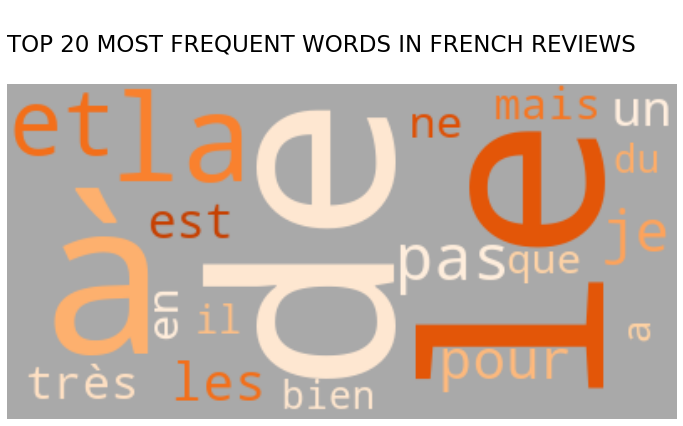

In [63]:
#crating a word cloud for French words
d = {}
for a, x in df_list_fr.values:
    d[a] = x

wordcloud = WordCloud(background_color='darkgray',colormap="Oranges")
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('\nTOP 20 MOST FREQUENT WORDS IN FRENCH REVIEWS\n', fontsize=23,  loc='left')

plt.axis("off")
plt.show()

In [64]:
#reviews in Geramn
train_df_de=train_df[train_df['language']=='de']

In [65]:
#counting most frequently used words
list_words_de=Counter(" ".join(train_df_de["review_body"]).split()).most_common(20)
df_list_de = pd.DataFrame(list_words_de)
df_list_de

,0,1
0,die,183282
1,und,167466
2,ist,143212
3,ich,131796
4,nicht,131308
5,der,126860
6,das,116675
7,es,88573
8,zu,87780
9,dem,86840


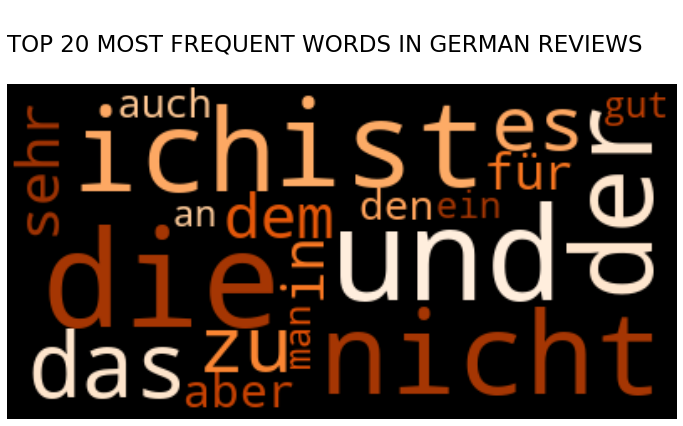

In [66]:
#crating a word cloud for German words
d = {}
for a, x in df_list_de.values:
    d[a] = x

wordcloud = WordCloud(background_color='black',colormap="Oranges")
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('\nTOP 20 MOST FREQUENT WORDS IN GERMAN REVIEWS\n', fontsize=23,  loc='left')

plt.axis("off")
plt.show()

In [19]:
#reviews in Spanish
train_df_es=train_df[train_df['language']=='es']

In [20]:
#counting most frequently used words
list_words_es=Counter(" ".join(train_df_es["review_body"]).split()).most_common(20)
df_list_es = pd.DataFrame(list_words_es)
df_list_es

,0,1
0,de,230704
1,el,220886
2,que,190680
3,y,182047
4,la,173877
5,no,153445
6,es,114523
7,a,107290
8,en,95315
9,lo,90913


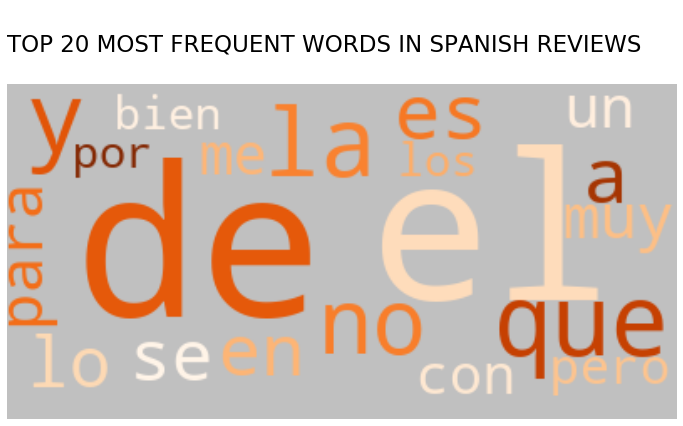

In [23]:
#crating a word cloud for Spanish words
import matplotlib.pyplot as plt
from wordcloud import WordCloud

d = {}
for a, x in df_list_es.values:
    d[a] = x

wordcloud = WordCloud(background_color='silver',colormap="Oranges")
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('\nTOP 20 MOST FREQUENT WORDS IN SPANISH REVIEWS\n', fontsize=23,  loc='left')

plt.axis("off")
plt.show()

In [46]:
test_df.shape

(20000, 9)

In [47]:
test_df = test_df.drop(columns=['Unnamed: 0'])

In [48]:
test_df=test_df[test_df['review_body']!=0]

In [49]:
#converting to lowercase
test_df['review_body']=test_df['review_body'].str.lower()

In [50]:
#removing numbers
test_df['review_body']=test_df['review_body'].str.replace('\d+', '')

In [51]:
#removing URLS
test_df['review_body']=test_df['review_body'].replace(to_replace=r'https?:\/\/.*[\r\n]*',value='',regex=True)

In [52]:
#concatenation replacing
test_df['review_body']=test_df['review_body'].apply(lambda item: ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in item.split(" ")]))

In [53]:
#removing special characters and punctuation except for 3 important ones
test_df['review_body']=test_df['review_body'].apply(lambda item: ''.join(char for char in item if char.isalnum() or char in {'„', '¿','¡', ' '}))
test_df                                                      

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,fr_0797681,product_fr_0072745,reviewer_fr_0724113,1,ca cest du vol vous ne recevrez qune lame alor...,ARNAQUE,fr,home_improvement
1,fr_0329266,product_fr_0182588,reviewer_fr_0116929,1,presque mois après la commande le produit nes...,NON REÇU!!!!,fr,baby_product
2,fr_0745602,product_fr_0542787,reviewer_fr_0704676,1,amazon na pu me livrer ce produit je suis déçu...,État d’âme,fr,home_improvement
3,fr_0186758,product_fr_0724656,reviewer_fr_0005830,1,pas adapté à le boîtier il flotte dedans,Trop grand !,fr,wireless
4,fr_0099947,product_fr_0453835,reviewer_fr_0403195,1,heureusement quamazon a le sens des affaires j...,Fuyez !!!,fr,wireless
...,...,...,...,...,...,...,...,...
19995,de_0928283,product_de_0728140,reviewer_de_0134979,5,sehr schick und super verarbeitet,Daumen hoch,de,sports
19996,de_0725010,product_de_0758201,reviewer_de_0824067,5,tolle farben gute qualität preis war oke,Einweg Schnapsgläser,de,home
19997,de_0357086,product_de_0051918,reviewer_de_0593990,5,durch die vergoldeten buchsen null verlustleis...,Super Kabel zum Super Preis.,de,other
19998,de_0870548,product_de_0424681,reviewer_de_0956397,5,sehr schöne und hochwertige hülle,Sehr tolle Hülle,de,wireless


In [54]:
#concatenating test and train data
common_df= pd.concat([train_df, test_df], axis=0)
common_df.shape

(819918, 8)

In [70]:
#list of most often used 200 words for Spanish
list_words_es1=Counter(" ".join(train_df_es["review_body"]).split()).most_common(200)
df_list_es1 = pd.DataFrame(list_words_es1)
df_list_es1

,0,1
0,de,230704
1,el,220886
2,que,190680
3,y,182047
4,la,173877
...,...,...
195,sea,3068
196,carga,3044
197,tienes,3042
198,diseño,3040


In [71]:
#lists of most often used 200 words for German, English and French
list_words_de1=Counter(" ".join(train_df_de["review_body"]).split()).most_common(200)
df_list_de1 = pd.DataFrame(list_words_de1)
list_words_fr1=Counter(" ".join(train_df_fr["review_body"]).split()).most_common(200)
df_list_fr1 = pd.DataFrame(list_words_fr1)
list_words1=Counter(" ".join(train_df_eng["review_body"]).split()).most_common(200)
df_list1 = pd.DataFrame(list_words1)
#concatenating the lists
duplicates= pd.concat([df_list_es1, df_list_de1,df_list_fr1,df_list1 ], axis=0)
duplicates.shape

(800, 2)

In [72]:
list(duplicates.columns)


[0, 1]

In [73]:
#dentifying duplicates for the languages
frame=pd.concat(g for _, g in duplicates.groupby(0) if len(g) > 1)
frame

,0,1
7,a,107290
17,a,48364
5,a,164356
98,also,8995
90,also,10518
...,...,...
9,un,77819
44,was,21710
14,was,71123
3,y,182047


In [74]:
#list of duplicates
list_of_words = frame[0].to_list()
list_of_words

['a',
 'a',
 'a',
 'also',
 'also',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'an',
 'an',
 'bien',
 'bien',
 'color',
 'color',
 'da',
 'da',
 'de',
 'de',
 'dem',
 'dem',
 'des',
 'des',
 'en',
 'en',
 'es',
 'es',
 'he',
 'he',
 'in',
 'in',
 'la',
 'la',
 'le',
 'le',
 'mal',
 'mal',
 'mal',
 'material',
 'material',
 'me',
 'me',
 'me',
 'mes',
 'mes',
 'no',
 'no',
 'on',
 'on',
 'que',
 'que',
 'se',
 'se',
 'si',
 'si',
 'so',
 'so',
 'son',
 'son',
 'super',
 'super',
 'top',
 'top',
 'top',
 'un',
 'un',
 'was',
 'was',
 'y',
 'y']

In [75]:
#creating a list with just one sample of a duplicate
temp_list = []

for i in list_of_words:
    if i not in temp_list:
        temp_list.append(i)

my_list = temp_list
my_list

['a',
 'also',
 'amazon',
 'an',
 'bien',
 'color',
 'da',
 'de',
 'dem',
 'des',
 'en',
 'es',
 'he',
 'in',
 'la',
 'le',
 'mal',
 'material',
 'me',
 'mes',
 'no',
 'on',
 'que',
 'se',
 'si',
 'so',
 'son',
 'super',
 'top',
 'un',
 'was',
 'y']

In [76]:
#removing the shared stop words from the data
pat = r'\b(?:{})\b'.format('|'.join(my_list))
common_df['new'] = common_df['review_body'].str.replace(pat, '')

In [77]:
common_df.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,new
0,fr_0497116,product_fr_0739436,reviewer_fr_0079605,1,le produit est noté comme livré depuis le jui...,Article non reçu !,fr,home,produit est noté comme livré depuis juillet...
1,fr_0014704,product_fr_0898711,reviewer_fr_0614903,1,pas terrible ce nai pas comme des faux cils na...,Rien ne vaut les vrais faux cils,fr,beauty,pas terrible ce nai pas comme faux cils natur...
2,fr_0851295,product_fr_0101306,reviewer_fr_0851899,1,je nai jamais reçu le produit,Jamais reçu,fr,home,je nai jamais reçu produit
3,fr_0148716,product_fr_0735028,reviewer_fr_0121344,1,appareil complètement inutile il peigne mais n...,Il ne coupe rien,fr,sports,appareil complètement inutile il peigne mais n...
4,fr_0689615,product_fr_0645938,reviewer_fr_0049041,1,à le bout de utilisations seulement la clé u...,Clé USB inutilisable,fr,pc,à bout utilisations seulement clé usb res...


In [78]:
#doing the same for the test and train 
train_df['new']=train_df['review_body'].str.replace(pat, '')
test_df['new']=test_df['review_body'].str.replace(pat, '')

In [79]:
#saving the dataframes
train_df.to_excel('train_df_clean.xlsx')
test_df.to_excel('test_df_clean.xlsx')
common_df.to_excel('common_df_clean.xlsx')

In [5]:
common_df.tail()

,Unnamed: 0,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,new
819913,19995,de_0928283,product_de_0728140,reviewer_de_0134979,5,sehr schick und super verarbeitet,Daumen hoch,de,sports,sehr schick und verarbeitet
819914,19996,de_0725010,product_de_0758201,reviewer_de_0824067,5,tolle farben gute qualität preis war oke,Einweg Schnapsgläser,de,home,tolle farben gute qualität preis war oke
819915,19997,de_0357086,product_de_0051918,reviewer_de_0593990,5,durch die vergoldeten buchsen null verlustleis...,Super Kabel zum Super Preis.,de,other,durch die vergoldeten buchsen null verlustleis...
819916,19998,de_0870548,product_de_0424681,reviewer_de_0956397,5,sehr schöne und hochwertige hülle,Sehr tolle Hülle,de,wireless,sehr schöne und hochwertige hülle
819917,19999,de_0725332,product_de_0088799,reviewer_de_0818315,5,alles ok passen und tun genau das was sie sollen,Schnelle Lieferung,de,sports,alles ok passen und tun genau das sie sollen
